In [1]:
import numpy as np
import pandas as pd

In [2]:
import numpy as np

def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

In [3]:
df=pd.read_csv('/Users/umashankarlath/Downloads/fedex.csv')
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,Petrol,Diesel
0,2015-04-01,2155,4131
1,2015-04-02,1930,5937
2,2015-04-03,1656,4912
3,2015-04-04,2750,3318
4,2015-04-05,2850,612


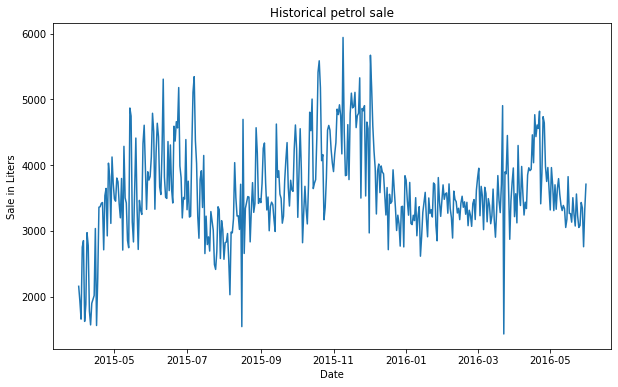

In [4]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df['Date'], df['Petrol'])
plt.xlabel("Date")
plt.ylabel("Sale in Liters")
plt.title("Historical petrol sale")
plt.show()

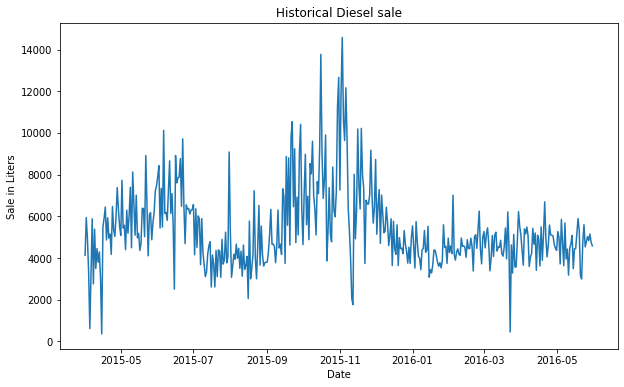

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(df['Date'], df['Diesel'])
plt.xlabel("Date")
plt.ylabel("Sale in Liters")
plt.title("Historical Diesel sale")
plt.show()

In [6]:
df_petrol=df[['Date','Petrol']]
df_petrol=df_petrol.set_index(['Date'])
df_diesel=df[['Date','Diesel']]
df_diesel=df_diesel.set_index(['Date'])
df_diesel.head()

,Diesel
Date,
2015-04-01,4131
2015-04-02,5937
2015-04-03,4912
2015-04-04,3318
2015-04-05,612


#### ADFULLER Test


In [7]:
from statsmodels.tsa.stattools import adfuller 
adf = adfuller(df_petrol['Petrol'],12)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")



Statistics analysis

Statistic Test :  -3.6913661425386275
p-value :  0.004236249146930369
# n_lags :  6
No of observation:  420
 critical value 1% : -3.4460159927788574
 critical value 5% : -2.868446209372638
 critical value 10% : -2.570448781179138


In [8]:
from statsmodels.tsa.stattools import adfuller 
adf = adfuller(df_diesel['Diesel'],12)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")



Statistics analysis

Statistic Test :  -2.976063475319496
p-value :  0.037191045081603216
# n_lags :  11
No of observation:  415
 critical value 1% : -3.446205926287236
 critical value 5% : -2.8685297226414734
 critical value 10% : -2.570493298011322



Statistics analysis

Statistic Test :  -9.090397834622033
p-value :  3.838197939856864e-15
# n_lags :  12
No of observation:  414
 critical value 1% : -3.4462444670071046
 critical value 5% : -2.8685466682709975
 critical value 10% : -2.5705023309762187


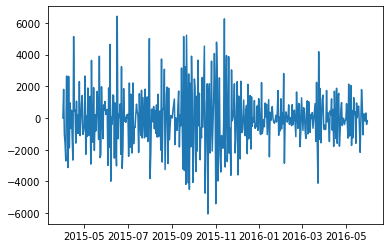

In [9]:
df_diesel['first_diffprice'] = df_diesel['Diesel'].diff() 
df_diesel['first_diffprice']=df_diesel['first_diffprice'].replace(np.nan,0)
df_diesel['first_diffprice'].head()

from statsmodels.tsa.stattools import adfuller 
adf = adfuller(df_diesel['first_diffprice'],12)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")

plt.plot(df_diesel['first_diffprice'])


Statistics analysis

Statistic Test :  -14.76287841105651
p-value :  2.3871878251790713e-27
# n_lags :  5
No of observation:  421
 critical value 1% : -3.445978550826048
 critical value 5% : -2.8684297456394874
 critical value 10% : -2.570440005247093


Text(0.5, 1.0, 'Historical Petrol sale')

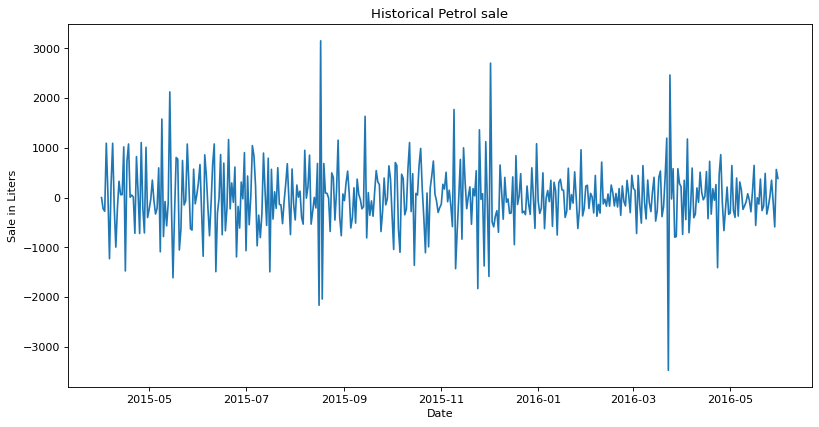

In [38]:
df_petrol['first_diffprice'] = df_petrol['Petrol'].diff() 
df_petrol['first_diffprice']=df_petrol['first_diffprice'].replace(np.nan,0)
df_petrol['first_diffprice'].head()

from statsmodels.tsa.stattools import adfuller 
adf = adfuller(df_petrol['first_diffprice'],12)
print("\nStatistics analysis\n")
print("Statistic Test : " , adf[0])
print("p-value : " , adf[1])
print("# n_lags : " , adf[2])
print("No of observation: " , adf[3])
for key,value in adf[4].items():
    print(f" critical value {key} : {value}")

from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
plt.plot(df_petrol['first_diffprice'])
plt.xlabel("Date")
plt.ylabel("Sale in Liters")
plt.title("Historical Petrol sale")

<Figure size 960x480 with 0 Axes>

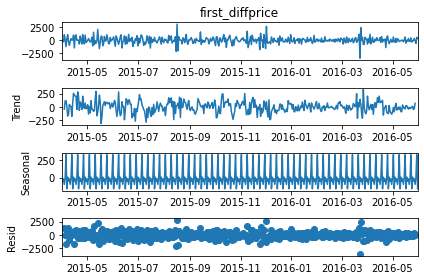

In [39]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df_petrol['first_diffprice'])

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid
from matplotlib.pyplot import figure
figure(figsize=(12, 6), dpi=80)
decompose_result.plot();

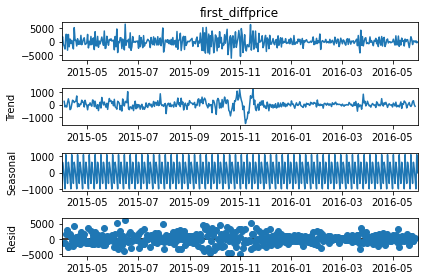

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_result = seasonal_decompose(df_diesel['first_diffprice'])

trend = decompose_result.trend
seasonal = decompose_result.seasonal
residual = decompose_result.resid

decompose_result.plot();

In [13]:
train_data_petrol = df_petrol['first_diffprice'][0:len(df_petrol)-31]
test_data_petrol = df_petrol['first_diffprice'][len(df_petrol)-31:]
train_data_diesel = df_diesel['first_diffprice'][0:len(df_diesel)-31]
test_data_diesel = df_diesel['first_diffprice'][len(df_diesel)-31:]
test_data_diesel.head()

Date
2016-05-01    -105.0
2016-05-02     905.0
2016-05-03    -290.0
2016-05-04   -1266.0
2016-05-05    2136.0
Name: first_diffprice, dtype: float64

#### Constant Value

The RMSE score of is 360.4042355238539
The MAPE value is 9.550561804544424


Text(0.5, 1.0, 'Petrol sale')

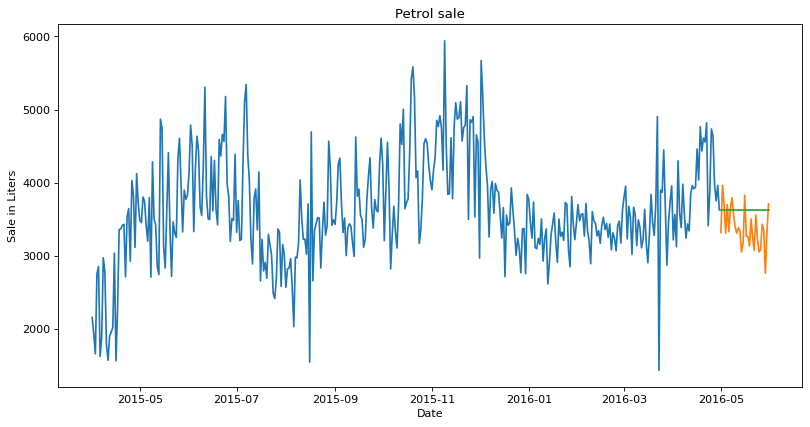

In [42]:
train_data_petrol_2 = df_petrol['Petrol'][0:len(df_petrol)-31]
test_data_petrol_2 = df_petrol['Petrol'][len(df_petrol)-31:]
import math
average_petrol=np.empty(31)
average_petrol.fill(train_data_petrol_2.mean())
MSE = np.square(np.subtract(test_data_petrol_2,average_petrol)).mean() 
RMSE = math.sqrt(MSE)
print("The RMSE score of is",RMSE)
print("The MAPE value is",mape(test_data_petrol_2,average_petrol))
figure(figsize=(12, 6), dpi=80)
plt.plot(train_data_petrol_2)
plt.plot(test_data_petrol_2)
plt.plot(test_data_petrol_2.index,average_petrol)
plt.xlabel("Date")
plt.ylabel("Sale in Liters")
plt.title("Petrol sale")

The RMSE score of is 1114.5807306391837
The MAPE value is 22.877530025992275


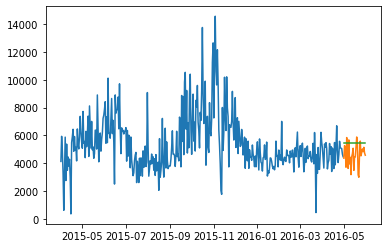

In [15]:
train_data_diesel_2 = df_diesel['Diesel'][0:len(df_petrol)-31]
test_data_diesel_2 = df_diesel['Diesel'][len(df_petrol)-31:]
import math
average_diesel=np.empty(31)
average_diesel.fill(train_data_diesel_2.mean())
MSE = np.square(np.subtract(test_data_diesel_2,average_diesel)).mean() 
RMSE = math.sqrt(MSE)
print("The RMSE score of is",RMSE)
print("The MAPE value is",mape(test_data_diesel_2,average_diesel))
plt.plot(train_data_diesel_2)
plt.plot(test_data_diesel_2)
plt.plot(test_data_diesel_2.index,average_diesel)

#### Moving Average Model

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:        first_diffprice   No. Observations:                  396
Model:                ARIMA(0, 0, 30)   Log Likelihood               -3051.727
Date:                Fri, 11 Nov 2022   AIC                           6167.454
Time:                        01:46:22   BIC                           6294.859
Sample:                    04-01-2015   HQIC                          6217.928
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.5355      1.656      0.927      0.354      -1.711       4.782
ma.L1         -0.7030      0.041    -17.023      0.000      -0.784      -0.622
ma.L2         -0.1501      0.052     -2.892      0.0

Text(0.5, 1.0, 'Petrol sale')

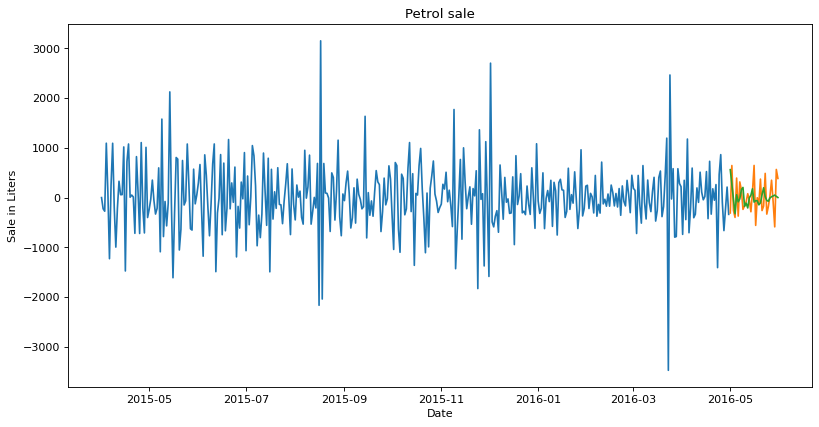

In [43]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train_data_petrol, order=(0,0,30))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.predict(start=len(train_data_petrol), end=len(train_data_petrol) + len(test_data_petrol)-1)
forcasted=pd.concat([train_data_petrol, predictions],axis=0)
df_petrol['MA_Forcast']=forcasted
figure(figsize=(12, 6), dpi=80)

plt.plot(train_data_petrol)
plt.plot(test_data_petrol)
plt.plot(predictions)
plt.xlabel("Date")
plt.ylabel("Sale in Liters")
plt.title("Petrol sale")

In [17]:
n=df_petrol['Petrol'][0]
df_petrol['forcasted']=n
for i in range(1,len(forcasted)):
    df_petrol['forcasted'][i]=df_petrol['forcasted'][i-1]+df_petrol['MA_Forcast'][i]
df_petrol

<ipython-input-17-7e2a9c4400e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petrol['forcasted'][i]=df_petrol['forcasted'][i-1]+df_petrol['MA_Forcast'][i]


,Petrol,first_diffprice,MA_Forcast,forcasted
Date,,,,
2015-04-01,2155,0.0,0.000000,2155
2015-04-02,1930,-225.0,-225.000000,1930
2015-04-03,1656,-274.0,-274.000000,1656
2015-04-04,2750,1094.0,1094.000000,2750
2015-04-05,2850,100.0,100.000000,2850
...,...,...,...,...
2016-05-27,3430,350.0,17.709211,3804
2016-05-28,3346,-84.0,33.275710,3837
2016-05-29,2757,-589.0,50.397552,3887


In [18]:
MSE = np.square(np.subtract(df_petrol['Petrol'][-31:-1],df_petrol['forcasted'][-31:-1])).mean() 
RMSE = math.sqrt(MSE)
print("The RMSE score of is",RMSE)
print("The MAPE value is",mape(df_petrol['Petrol'][-31:-1],df_petrol['forcasted'][-31:-1]))

The RMSE score of is 670.5997812903511
The MAPE value is 19.256805626632442


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check

                               SARIMAX Results                                
Dep. Variable:        first_diffprice   No. Observations:                  396
Model:                ARIMA(0, 0, 35)   Log Likelihood               -3426.896
Date:                Thu, 10 Nov 2022   AIC                           6927.791
Time:                        20:32:05   BIC                           7075.104
Sample:                    04-01-2015   HQIC                          6986.152
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8554     27.701      0.031      0.975     -53.437      55.148
ma.L1         -0.7074      0.078     -9.056      0.000      -0.861      -0.554
ma.L2         -0.0266      0.071     -0.373      0.7

<ipython-input-19-f6f34cd823ec>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel['forcasted'][i]=df_diesel['forcasted'][i-1]+df_diesel['MA_Forcast'][i]


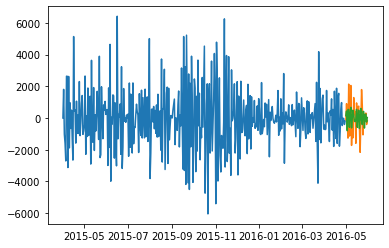

In [19]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train_data_diesel, order=(0,0,35))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.predict(start=len(train_data_diesel), end=len(train_data_diesel) + len(test_data_diesel)-1)
forcasted=pd.concat([train_data_diesel, predictions],axis=0)
df_diesel['MA_Forcast']=forcasted
plt.plot(train_data_diesel)
plt.plot(test_data_diesel)
plt.plot(predictions)


n=df_diesel['Diesel'][0]
df_diesel['forcasted']=n
for i in range(1,len(forcasted)):
    df_diesel['forcasted'][i]=df_diesel['forcasted'][i-1]+df_diesel['MA_Forcast'][i]
df_diesel.head()

MSE = np.square(np.subtract(df_diesel['Diesel'][-31:-1],df_diesel['forcasted'][-31:-1])).mean() 
RMSE = math.sqrt(MSE)
print("The RMSE score of is",RMSE)
print("The MAPE value is",mape(df_diesel['Diesel'][-31:-1],df_diesel['forcasted'][-31:-1]))

#### AR Model

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        first_diffprice   No. Observations:                  396
Model:                ARIMA(30, 0, 0)   Log Likelihood               -3050.442
Date:                Thu, 10 Nov 2022   AIC                           6164.884
Time:                        21:44:32   BIC                           6292.289
Sample:                    04-01-2015   HQIC                          6215.358
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9144      7.598      0.910      0.363      -7.977      21.806
ar.L1         -0.6975      0.042    -16.680      0.000      -0.779      -0.616
ar.L2         -0.6380      0.060    -10.561      0.0

<ipython-input-31-337c273b5a68>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petrol['forcasted'][i]=df_petrol['forcasted'][i-1]+df_petrol['AR_Forcast'][i]
<ipython-input-31-337c273b5a68>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petrol['forcasted'][-31:-1]=df_petrol['forcasted'][-31:-1]-400


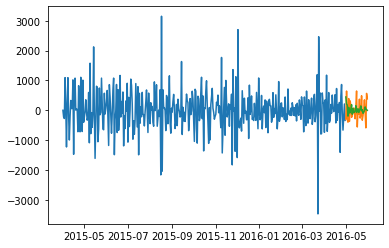

In [31]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train_data_petrol, order=(30,0,0))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.predict(start=len(train_data_petrol), end=len(train_data_petrol) + len(test_data_petrol)-1)
forcasted=pd.concat([train_data_petrol, predictions],axis=0)
df_petrol['AR_Forcast']=forcasted
plt.plot(train_data_petrol)
plt.plot(test_data_petrol)
plt.plot(predictions)

n=df_petrol['Petrol'][0]
df_petrol['forcasted']=n
for i in range(1,len(forcasted)):
    df_petrol['forcasted'][i]=df_petrol['forcasted'][i-1]+df_petrol['AR_Forcast'][i]
df_petrol['forcasted'][-31:-1]=df_petrol['forcasted'][-31:-1]-400
df_petrol

MSE = np.square(np.subtract(df_petrol['Petrol'][-31:-1],df_petrol['forcasted'][-31:-1])).mean() 
RMSE = math.sqrt(MSE)
print("The RMSE score of is",RMSE)
print("The MAPE value is",mape(df_petrol['Petrol'][-31:-1],df_petrol['forcasted'][-31:-1]))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:        first_diffprice   No. Observations:                  396
Model:                ARIMA(35, 0, 0)   Log Likelihood               -3433.910
Date:                Thu, 10 Nov 2022   AIC                           6941.819
Time:                        21:45:33   BIC                           7089.132
Sample:                    04-01-2015   HQIC                          7000.180
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8539     17.305      0.049      0.961     -33.064      34.772
ar.L1         -0.7056      0.056    -12.672      0.000      -0.815      -0.596
ar.L2         -0.5170      0.062     -8.374      0.0

<ipython-input-32-52f2973e2b17>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel['forcasted'][i]=df_diesel['forcasted'][i-1]+df_diesel['AR_Forcast'][i]
<ipython-input-32-52f2973e2b17>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel['Diesel'][-31:-1]=df_diesel['forcasted'][-31:-1]-400


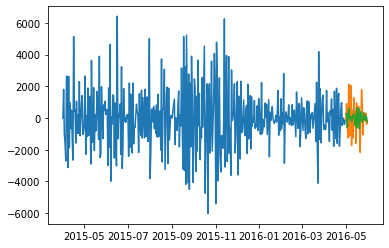

In [32]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train_data_diesel, order=(35,0,0))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.predict(start=len(train_data_diesel), end=len(train_data_diesel) + len(test_data_diesel)-1)
forcasted=pd.concat([train_data_diesel, predictions],axis=0)
df_diesel['AR_Forcast']=forcasted
plt.plot(train_data_diesel)
plt.plot(test_data_diesel)
plt.plot(predictions)


n=df_diesel['Diesel'][0]
df_diesel['forcasted']=n
for i in range(1,len(forcasted)):
    df_diesel['forcasted'][i]=df_diesel['forcasted'][i-1]+df_diesel['AR_Forcast'][i]
df_diesel['Diesel'][-31:-1]=df_diesel['forcasted'][-31:-1]-400
df_diesel.head()

MSE = np.square(np.subtract(df_diesel['Diesel'][-31:-1],df_diesel['forcasted'][-31:-1])).mean() 
RMSE = math.sqrt(MSE)
print("The RMSE score of is",RMSE)
print("The MAPE value is",mape(df_diesel['Diesel'][-31:-1],df_diesel['forcasted'][-31:-1]))

#### ARIMA 

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

                               SARIMAX Results                                
Dep. Variable:        first_diffprice   No. Observations:                  396
Model:               ARIMA(30, 0, 30)   Log Likelihood               -3040.236
Date:                Thu, 10 Nov 2022   AIC                           6204.473
Time:                        20:32:27   BIC                           6451.321
Sample:                    04-01-2015   HQIC                          6302.266
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.6767      2.718      1.353      0.176      -1.650       9.003
ar.L1         -0.5689      8.669     -0.066      0.948     -17.560      16.423
ar.L2         -0.0853      0.857     -0.099      0.9

<ipython-input-20-4d2f93e8a305>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petrol['forcasted'][i]=df_petrol['forcasted'][i-1]+df_petrol['MA_Forcast'][i]
<ipython-input-20-4d2f93e8a305>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_petrol['forcasted'][-31:-1]=df_petrol['forcasted'][-31:-1]-600


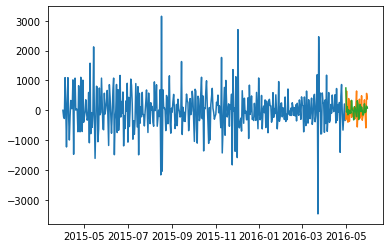

In [20]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train_data_petrol, order=(30,0,30))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.predict(start=len(train_data_petrol), end=len(train_data_petrol) + len(test_data_petrol)-1)
forcasted=pd.concat([train_data_petrol, predictions],axis=0)
df_petrol['ARIMA_Forcast']=forcasted
plt.plot(train_data_petrol)
plt.plot(test_data_petrol)
plt.plot(predictions)

n=df_petrol['Petrol'][0]
df_petrol['forcasted']=n
for i in range(1,len(forcasted)):
    df_petrol['forcasted'][i]=df_petrol['forcasted'][i-1]+df_petrol['ARIMA_Forcast'][i]
df_petrol['forcasted'][-31:-1]=df_petrol['forcasted'][-31:-1]-600
df_petrol

MSE = np.square(np.subtract(df_petrol['Petrol'][-31:-1],df_petrol['forcasted'][-31:-1])).mean() 
RMSE = math.sqrt(MSE)
print("The RMSE score of is",RMSE)
print("The MAPE value is",mape(df_petrol['Petrol'][-31:-1],df_petrol['forcasted'][-31:-1]))

/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA paramete

                               SARIMAX Results                                
Dep. Variable:        first_diffprice   No. Observations:                  396
Model:               ARIMA(35, 0, 35)   Log Likelihood               -3405.782
Date:                Fri, 11 Nov 2022   AIC                           6955.563
Time:                        01:48:38   BIC                           7242.225
Sample:                    04-01-2015   HQIC                          7069.130
                         - 04-30-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8550     23.991      0.036      0.972     -46.166      47.876
ar.L1         -0.3639      1.638     -0.222      0.824      -3.575       2.847
ar.L2         -0.1346      1.280     -0.105      0.9

<ipython-input-44-fe2f973a3ef5>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel['forcasted'][i]=df_diesel['forcasted'][i-1]+df_diesel['ARIMA_Forcast'][i]
<ipython-input-44-fe2f973a3ef5>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel['Diesel'][-31:-1]=df_diesel['forcasted'][-31:-1]-300


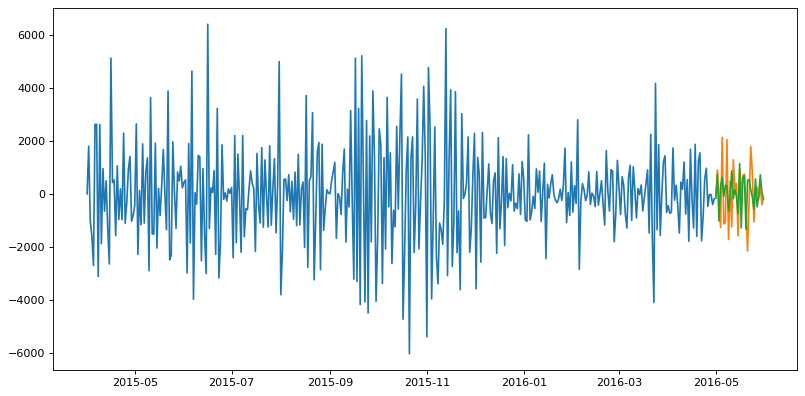

In [44]:
import statsmodels.api as sm

model = sm.tsa.arima.ARIMA(train_data_diesel, order=(35,0,35))
model_fit = model.fit()
print(model_fit.summary())
predictions = model_fit.predict(start=len(train_data_diesel), end=len(train_data_diesel) + len(test_data_diesel)-1)
forcasted=pd.concat([train_data_diesel, predictions],axis=0)
figure(figsize=(12, 6), dpi=80)

df_diesel['ARIMA_Forcast']=forcasted
plt.plot(train_data_diesel)
plt.plot(test_data_diesel)
plt.plot(predictions)


n=df_diesel['Diesel'][0]
df_diesel['forcasted']=n
for i in range(1,len(forcasted)):
    df_diesel['forcasted'][i]=df_diesel['forcasted'][i-1]+df_diesel['ARIMA_Forcast'][i]
df_diesel['Diesel'][-31:-1]=df_diesel['forcasted'][-31:-1]-300
df_diesel.head()


MSE = np.square(np.subtract(df_diesel['Diesel'][-31:-1],df_diesel['forcasted'][-31:-1])).mean() 
RMSE = math.sqrt(MSE)
print("The RMSE score of is",RMSE)
print("The MAPE value is",mape(df_diesel['Diesel'][-31:-1],df_diesel['forcasted'][-31:-1]))

In [22]:
df_petrol['forcasted'][-31:-1].sum()

110220

In [23]:
df_diesel['Diesel'][-31:-1].sum()

144982

In [25]:
train_data_petrol_2.mean()

3623.7676767676767

In [26]:
import statistics
(statistics.stdev(train_data_petrol_2))

726.7683011873808